In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt 
from pandas.io.json import json_normalize

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
youtubeUS = pd.read_csv('USvideos.csv')

In [14]:
youtubeUS.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
import json
import csv

with open('US_category_id.json', 'r') as jsonfile:
    data=jsonfile.read()
 
jsonobj = json.loads(data)

In [10]:
keylist = ['id', 'title']
f = csv.writer(open("/Users/gnteja/Desktop/youtube_testy.csv", "w"))
f.writerow(keylist)
for records in jsonobj['items']:
    currentrecord = []
    currentrecord.append(records['id'])
    currentrecord.append(records['snippet']['title'])
    f.writerow(currentrecord)

In [15]:
CategoryCSV = pd.read_csv('youtube_testx.csv')

In [16]:
CategoryCSV = CategoryCSV.rename(columns={'id': 'category_id'})
CategoryCSV = CategoryCSV.rename(columns={'title': 'category_name'})
print("Shape of data: {}".format(CategoryCSV.shape))

Shape of data: (32, 2)


In [17]:
Trend_Video_US = pd.merge(youtubeUS,CategoryCSV,how="left",on="category_id")

In [18]:
Trend_Video_US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [19]:
Trend_Video_US.set_index(['trending_date','video_id'],inplace=True)
Trend_Video_US.head()

title  \
trending_date video_id                                                         
17.14.11      2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE   
              1ZAPwfrtAFY  The Trump Presidency: Last Week Tonight with J...   
              5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...   
              puqaWrEC7tY                   Nickelback Lyrics: Real or Fake?   
              d380meD0W0M                           I Dare You: GOING BALD!?   

                                   channel_title  category_id  \
trending_date video_id                                          
17.14.11      2kyS6SvSYSE           CaseyNeistat           22   
              1ZAPwfrtAFY        LastWeekTonight           24   
              5qpjK5DgCt4           Rudy Mancuso           23   
              puqaWrEC7tY  Good Mythical Morning           24   
              d380meD0W0M               nigahiga           24   

                                       publish_time  \
trending_date video_id                                
17.14.11      2kyS6SvSYSE  2017-11-13T17:13:01.000Z   
              1ZAPwfrtAFY  2017-11-13T07:30:00.000Z   
              5qpjK5DgCt4  2017-11-12T19:05:24.000Z   
              puqaWrEC7tY  2017-11-13T11:00:04.000Z   
              d380meD0W0M  2017-11-12T18:01:41.000Z   

                                                                        tags  \
trending_date video_id                                                         
17.14.11      2kyS6SvSYSE                                    SHANtell martin   
              1ZAPwfrtAFY  last week tonight trump presidency|"last week ...   
              5qpjK5DgCt4  racist superman|"rudy"|"mancuso"|"king"|"bach"...   
              puqaWrEC7tY  rhett and link|"gmm"|"good mythical morning"|"...   
              d380meD0W0M  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   

                             views   likes  dislikes  comment_count  \
trending_date video_id                                                
17.14.11      2kyS6SvSYSE   748374   57527      2966          15954   
              1ZAPwfrtAFY  2418783   97185      6146          12703   
              5qpjK5DgCt4  3191434  146033      5339           8181   
              puqaWrEC7tY   343168   10172       666           2146   
              d380meD0W0M  2095731  132235      1989          17518   

                                                           thumbnail_link  \
trending_date video_id                                                      
17.14.11      2kyS6SvSYSE  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
              1ZAPwfrtAFY  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
              5qpjK5DgCt4  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
              puqaWrEC7tY  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
              d380meD0W0M  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

                           comments_disabled  ratings_disabled  \
trending_date video_id                                           
17.14.11      2kyS6SvSYSE              False             False   
              1ZAPwfrtAFY              False             False   
              5qpjK5DgCt4              False             False   
              puqaWrEC7tY              False             False   
              d380meD0W0M              False             False   

                           video_error_or_removed  \
trending_date video_id                              
17.14.11      2kyS6SvSYSE                   False   
              1ZAPwfrtAFY                   False   
              5qpjK5DgCt4                   False   
              puqaWrEC7tY                   False   
              d380meD0W0M                   False   

                                                                 description  \
trending_date video_id                                                         
17.14.11      2kyS6SvSYSE  SHANTELL'S CHANNEL - https://www.youtube.com/s.

In [20]:
Trend_Video_US['dislike_percentage'] = Trend_Video_US['dislikes'] / (Trend_Video_US['dislikes'] + Trend_Video_US['likes'])
Trend_Video_US.dislike_percentage.describe(percentiles=[.05,.25,.5,.75,.95])

count    40779.000000
mean         0.066887
std          0.102317
min          0.000000
5%           0.007177
25%          0.017210
50%          0.033012
75%          0.069669
95%          0.250307
max          1.000000
Name: dislike_percentage, dtype: float64

In [21]:
Trend_Video_US.dislike_percentage.describe()

count    40779.000000
mean         0.066887
std          0.102317
min          0.000000
25%          0.017210
50%          0.033012
75%          0.069669
max          1.000000
Name: dislike_percentage, dtype: float64

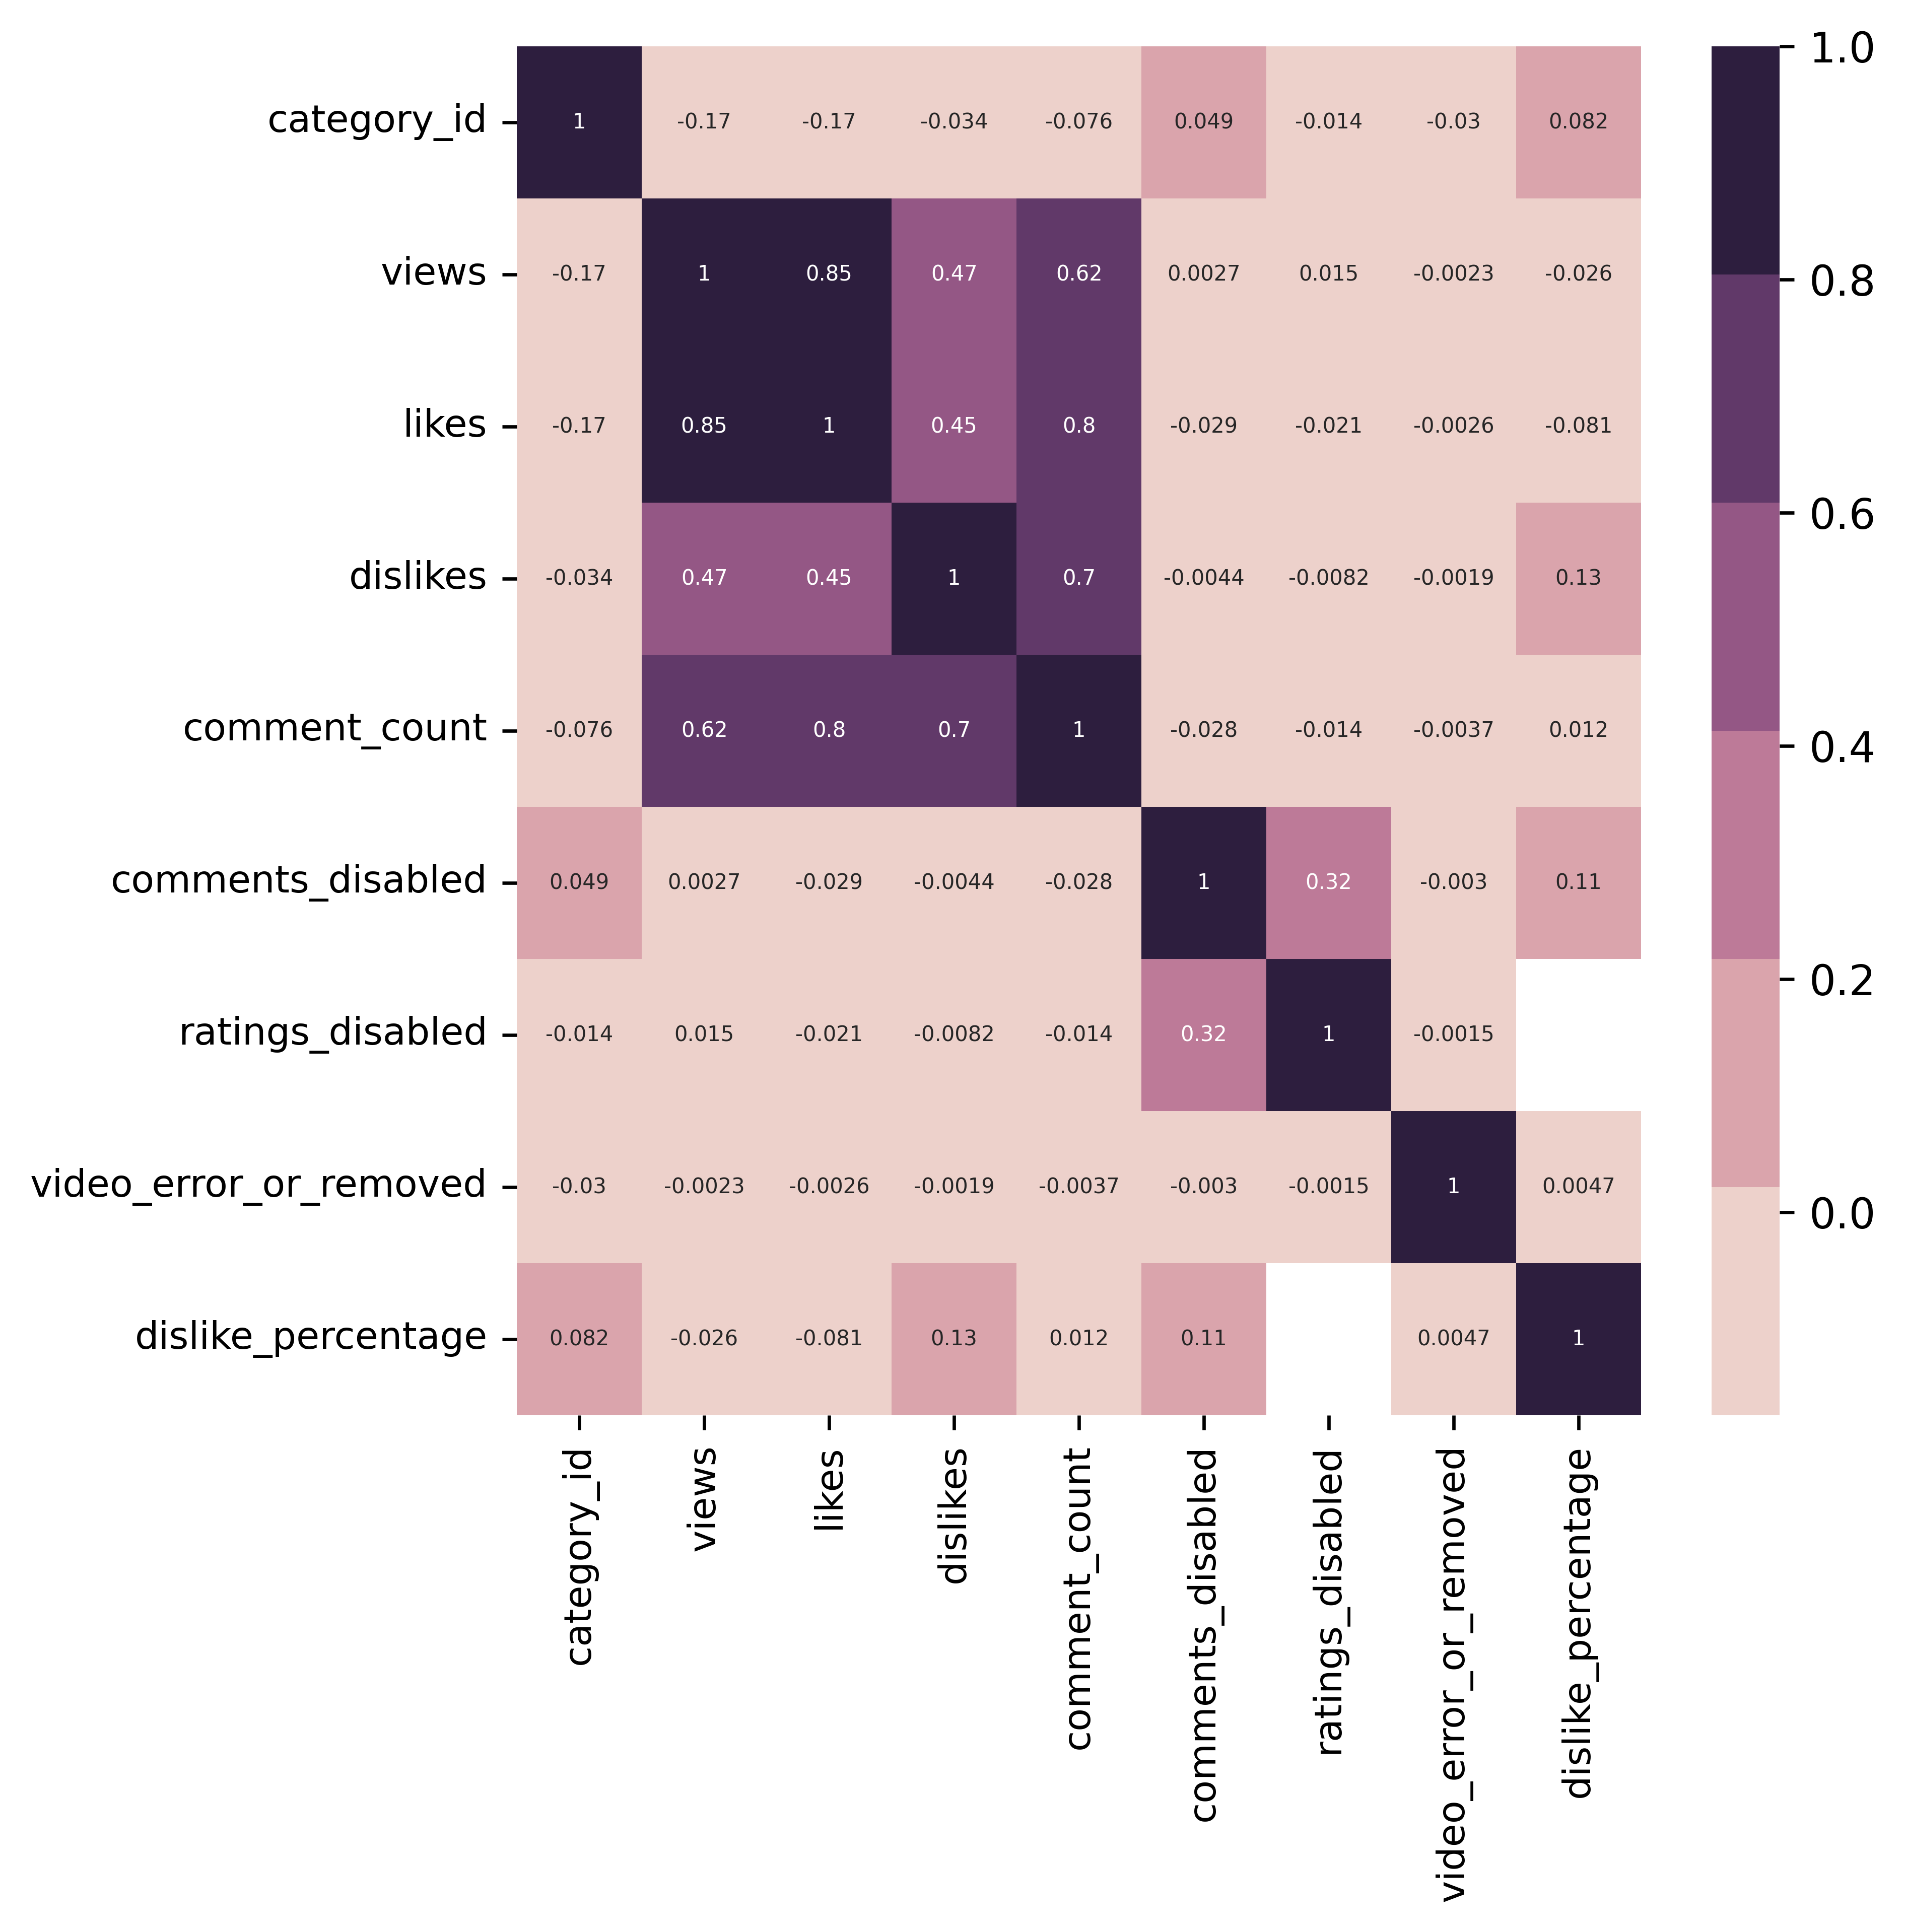

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = Trend_Video_US.corr()

plt.figure(figsize=(6, 6), dpi = 600) 
cmap = sns.cubehelix_palette()

sns.heatmap(corr, cmap=cmap, annot=True, annot_kws={"size": 5})

plt.tick_params(axis = 'x', labelsize = 9) 
plt.tick_params(axis = 'y', labelsize = 9)

In [24]:
Trend_Video_US['likeability_ratio']=Trend_Video_US['likes']/Trend_Video_US['dislikes'].replace(0,1)

In [25]:

#Likeability ratios of videos belonging to all categories on average
USvideo_cat=Trend_Video_US.groupby('category_name',as_index=False)['likeability_ratio'].mean()
USvideo_cat.sort_values('likeability_ratio',ascending=False).head()

,category_name,likeability_ratio
11,Pets & Animals,62.240451
7,Music,59.909558
10,People & Blogs,56.364487
6,Howto & Style,50.378727
2,Education,49.710475


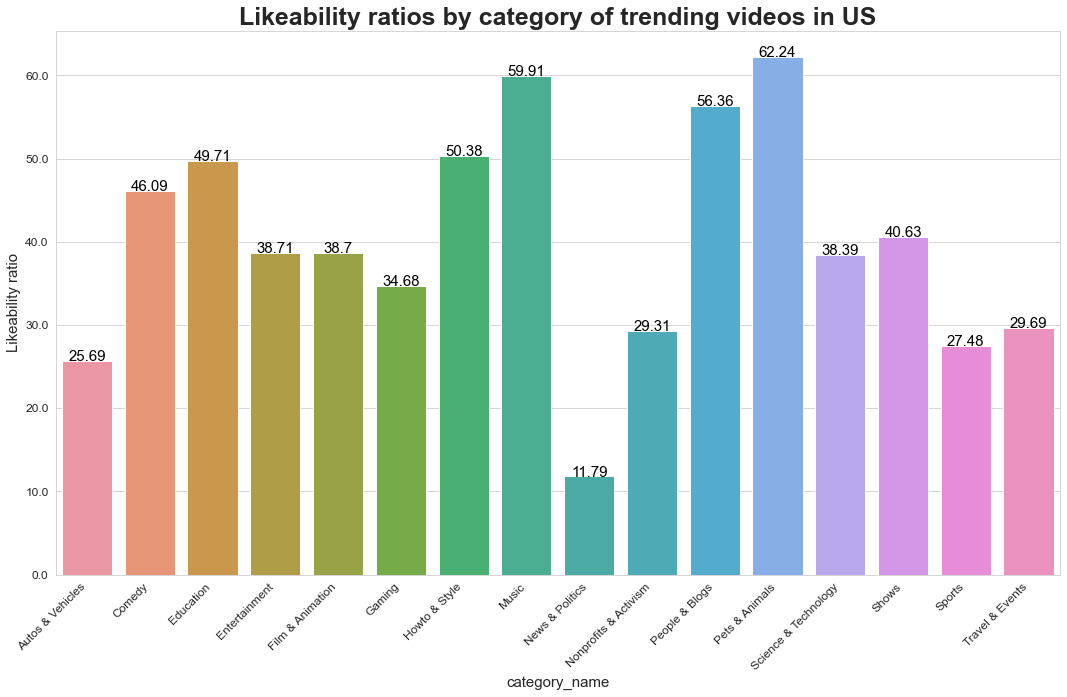

In [32]:
USvideo_cat=Trend_Video_US.groupby('category_name',as_index=False)['likeability_ratio'].mean()
USvideo_cat.sort_values('likeability_ratio',ascending=False).head()

#getting a visualization of the categories with the highest likeability ratio
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="category_name",y="likeability_ratio", data=USvideo_cat)
plt.xlabel('category_name',fontsize=15)
plt.ylabel('Likeability ratio',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),size = 12, rotation = 45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticks(), size = 12)
plt.title('Likeability ratios by category of trending videos in US',size=25, weight='bold')
for index, row in USvideo_cat.iterrows():
    ax.text(row.name,row.likeability_ratio, round(row.likeability_ratio,2), color='black', ha="center", size = 15)
plt.show()

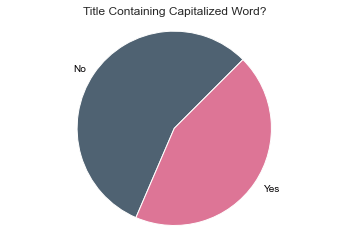

In [27]:
 def capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


Trend_Video_US["contains_capitalized"] = Trend_Video_US["title"].apply(capitalized_word)

value_counts = Trend_Video_US["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#4F6272','#DD7596'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Containing Capitalized Word?')

In [28]:
Trend_Video_US["contains_capitalized"].value_counts(normalize=True)

False    0.560429
True     0.439571
Name: contains_capitalized, dtype: float64

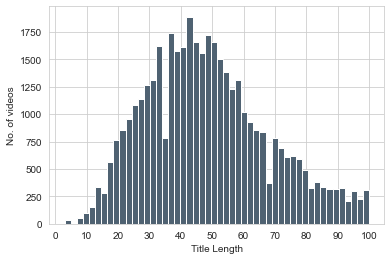

In [31]:
#PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
PLOT_COLORS = ["#268bd2","#DD7596","#B7C3F3","#8EB897", "#4F6272"]

Trend_Video_US["title_length"] = Trend_Video_US["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(Trend_Video_US["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

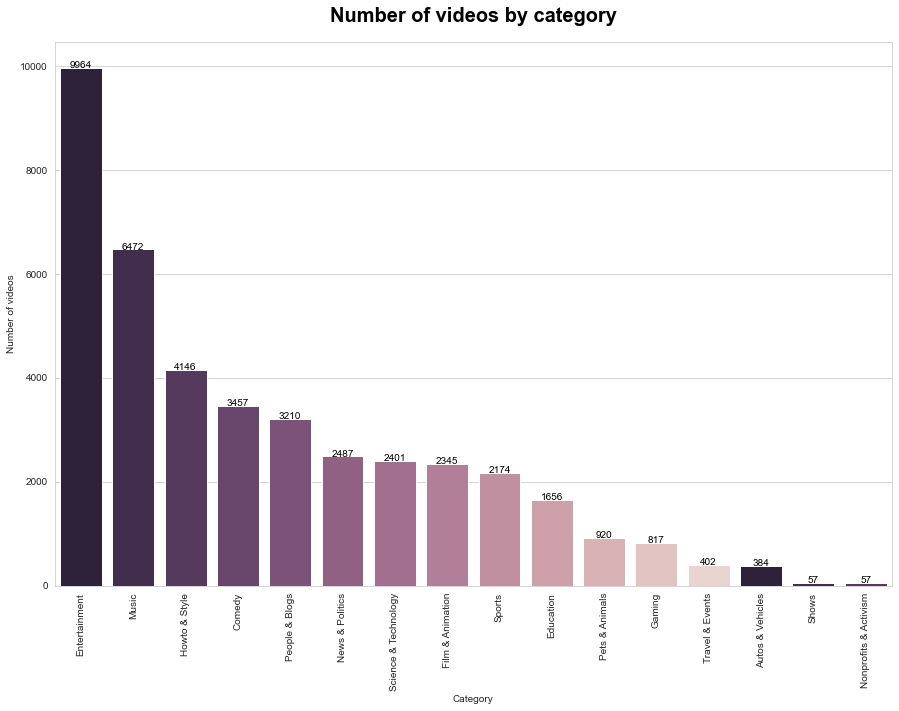

In [41]:
category_Trend_Video_US = Trend_Video_US["category_name"].value_counts().to_frame().reset_index()
category_Trend_Video_US.rename(columns={"index": "category", "category_name": "No_of_videos"}, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
_ = sns.barplot(x="category", y="No_of_videos", data=category_Trend_Video_US, 
                palette=sns.cubehelix_palette(n_colors=13, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Number of videos")
for index, row in category_Trend_Video_US.iterrows():
    ax.text(row.name,row.No_of_videos, round(row.No_of_videos,2), color='black', ha="center", size = 10)
_=ax.set_title('Number of videos by category', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'black'}, pad=20)